<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/First_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running the First Regression in Python

Suppose this is your first time to write the code. Perhaps, you want to run a simple regression using two series of asset prices to fin the equity beta. Let's use a step-by-step approach to complete the task.

    Step 1: Download two assets' prices from the web
    Step 2: Put them onto a matrix form
    Step 3: Run the OLS
    Step 4: Plot data

### Step 1: Download data
We will use yahoo finance package (https://pypi.org/project/yfinance/) to download Yahoo Finance data from the web. We need to (1) install and (2) import this package.

In [ ]:
!pip install yfinance -q  # to install, remove # and run the cell

In [ ]:
import yfinance as yf
from requests import Session

# As a note: In your homework, as yfinance has updated resently, you will need to install and include the 'requests' package and use this session.headers line. You can just copy this for the homework and adjust the following
# Ticker -> TSLA | ['Adj Close'] -> ['Close] | These two updates, plus adjusting the dates, will allow the code to work.

session = Session()
session.headers.update({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}) # required for the moment unfortunately

data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')['Close'] # without ['Close'] we can get OHLC + Volume data, we stick to close for now.
data.columns = ['Close']
data.index.name = 'Date'
display(data.tail())




YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-12-24,128.905807
2020-12-28,133.516205
2020-12-29,131.738480
2020-12-30,130.615128
2020-12-31,129.609100


In [ ]:
# download
mystock = yf.download("TSLA", start="2011-01-01", end="2022-05-31", interval='1mo')['Close']
index = yf.download("SPY", start="2011-01-01", end="2022-05-31", interval='1mo')['Close']
mystock.columns = ['TSLA']; index.columns = ['SPY']
mystock.index.name = 'Date'; index.index.name = 'Date'
display(mystock.tail()); display(index.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA
Date,
2022-01-01,312.239990
2022-02-01,290.143341
2022-03-01,359.200012
2022-04-01,290.253326
2022-05-01,252.753326


,SPY
Date,
2022-01-01,430.576294
2022-02-01,417.866943
2022-03-01,432.231934
2022-04-01,395.520233
2022-05-01,396.413055


### Step 2: Put two time series onto a matrix
We need pandas module, so let's install and import it. https://pandas.pydata.org/

In [ ]:
#!pip install pandas   # Actually, you have this alread when you isntalled Anaconda.
import pandas as pd

In [ ]:
# combine two asset prices onto one matrix called pandas dataframe
data = pd.concat([mystock, index], axis=1)

# drop missing observations
data2 = data.dropna()

# compute monthly returns and drop the first observation
data3 = data2.pct_change().dropna()
data3

,TSLA,SPY
Date,,
2011-02-01,-0.008714,0.034737
2011-03-01,0.161574,-0.004205
2011-04-01,-0.005405,0.033431
2011-05-01,0.092029,-0.011215
2011-06-01,-0.033510,-0.021720
...,...,...
2022-01-01,-0.113609,-0.049413
2022-02-01,-0.070768,-0.029517
2022-03-01,0.238009,0.034377


### Step 3: Run OLS
We need to install and import statsmodels module. https://www.statsmodels.org/stable/index.html

In [ ]:
#!pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
# run OLS
formula = 'TSLA ~ SPY'                      # set dep var and indep var
results = smf.ols(formula, data3).fit()     # run OLS
print(results.summary())                    # print

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     25.35
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.51e-06
Time:                        01:41:29   Log-Likelihood:                 54.624
No. Observations:                 136   AIC:                            -105.2
Df Residuals:                     134   BIC:                            -99.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0319      0.015      2.198      0.0

### beta of TSLA = 1.7553

### Step 4: Plot the result
We need to install and import matplotlib module. https://matplotlib.org/

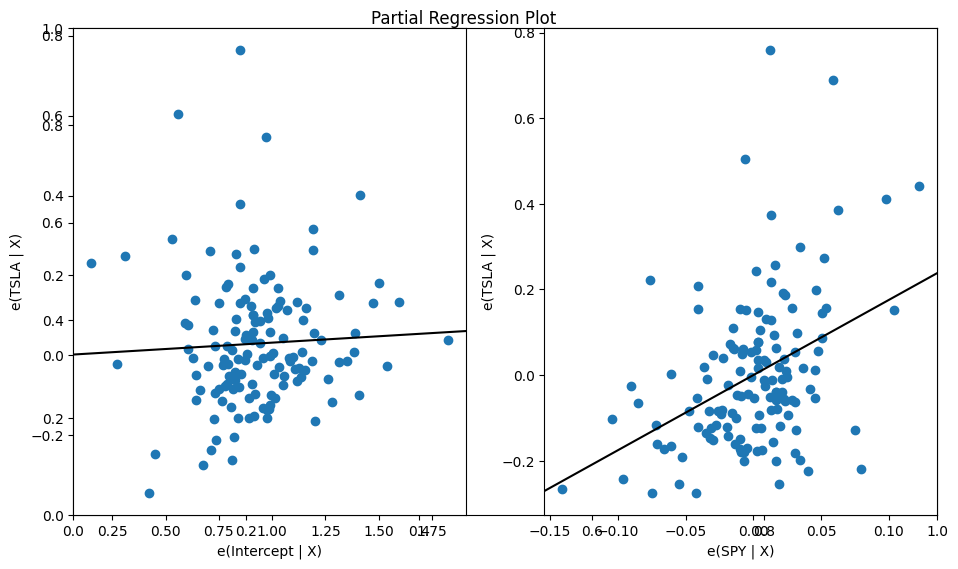

In [ ]:
#!pip install matplotlib                            #again, if you installed Anaconda, you have this already.
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)

### Extra 1: using scipy module, we can get the same beta!

In [ ]:
#!pip install scipy
from scipy import stats

beta,alpha,r_value,p_value,std_err = stats.linregress(data3['SPY'],data3["TSLA"])

print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

1.7553
0.0319
0.4
0.0


### Extra 2: using a beta formula, we can get the same beta.

#$$
\beta_{tsla} = \frac{\sigma_{tsla,spy}}{\sigma_{spy}^2}
$$


In [ ]:
#  find covariance matrix
cov = data3.cov() * 12
print(cov)
print('\n')     # to give a space
print(round(cov.iloc[0,1]/cov.iloc[1,1], 4))

          TSLA       SPY
TSLA  0.376964  0.034167
SPY   0.034167  0.019465


1.7553


### Extra3: using linear algebra, we can get the same beta.
Need to install numpy and import it. You probably have this alreay. So skip installation. Just import it. https://numpy.org/

In [ ]:
# warnings are annoying, so I include below to supress them. You do not need to do this.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import numpy as np

X = data3['SPY']
y = data3['TSLA']
X_ols = sm.add_constant(X)   # add a constant vector
#print(X_ols)

# compute beta using matrix operation
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
print(round(beta[1], 4))

1.7553
